In [ ]:
#default_exp datablock

# DataBlock

> process timeseries datasets with DataBloc

In [ ]:
#export
from torchtools.data import *
from torchtools.datasets import *

In [ ]:
from torchtools.augmentations import *

In [ ]:
from fastai2.data.all import *

In [ ]:
import pandas as pd
import numpy as np
from functools import partial

#### DataFrame Transforms

In [ ]:
def _get_x(df, cols = None):
#     print(df.shape)
#     print(df)
#     print(cols)
    data = np.stack([df[col].values for col in cols]).astype('float32')
    data_items = TSTensor(np.stack([data[i] for i in range(data.shape[0])]))
    return data_items
    
def _get_y(df, dep='y0'):
    return TensorFloat(df[dep].astype('float32'))


In [ ]:
df_main = pd.read_csv('./data/custom/bi_sample_anon.csv', nrows=100000)

In [ ]:
## simple config
x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
dep = 'y0'
n_train = 8000

In [ ]:
df_main

,nf0,nf1,nf2,nf3,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,...,x5_2,x5_3,x5_4,x5_5,x5_6,x5_7,x5_8,x5_9,y0,y1
0,2009-01-02 19:30:00,2.77,56.497175,109.890110,-7.843137,100.000000,-6.497726,-24.509804,-33.222591,-42.735043,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-2.0,-56.497175,0.000000
1,2009-01-02 19:30:00,2.92,52.083333,98.039216,-161.290323,-42.372881,-96.153846,100.000000,100.000000,100.000000,...,1.0,2.0,1.0,0.0,0.0,0.0,2.0,-1.0,-52.083333,0.000000
2,2009-01-03 11:30:00,2.08,92.592593,92.592593,-50.761421,-80.645161,-12.674271,100.000000,100.000000,100.000000,...,-2.0,-2.0,0.0,-3.0,0.0,2.0,1.0,0.0,-92.592593,-92.592593
3,2009-01-03 11:30:00,4.00,33.333333,117.647059,-129.870130,-9.090909,100.000000,100.000000,-46.728972,100.000000,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0.0,-33.333333,100.000000
4,2009-01-03 13:45:00,1.90,111.111111,113.636364,-10.526316,-42.553191,100.000000,-68.027211,-29.585799,-144.927536,...,1.0,-2.0,0.0,0.0,-1.0,2.0,-1.0,0.0,-111.111111,-113.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-12-10 18:45:00,3.79,35.842294,120.481928,100.000000,-84.033613,-47.393365,-74.626866,100.000000,-22.522523,...,0.0,-5.0,0.0,-1.0,0.0,-2.0,-1.0,-1.0,-35.842294,-120.481928
99996,2013-12-10 18:45:00,1.39,256.410256,105.263158,100.000000,70.000000,-11.160714,100.000000,100.000000,100.000000,...,1.0,1.0,-1.0,0.0,-2.0,-3.0,0.0,5.0,100.000000,100.000000
99997,2013-12-10 18:45:00,8.77,12.870013,101.010101,100.000000,100.000000,-30.674847,-163.934426,100.000000,-3.025719,...,1.0,-3.0,-4.0,-1.0,-1.0,-4.0,0.0,-3.0,-12.870013,-101.010101
99998,2013-12-10 18:45:00,2.23,81.300813,107.526882,100.000000,-5.665722,100.000000,100.000000,-3.846154,100.000000,...,2.0,-1.0,-3.0,3.0,-1.0,-4.0,1.0,2.0,100.000000,100.000000


In [ ]:
datasets = Datasets(df_main, tfms = [[partial(_get_x, cols=x_cols)], [_get_y]])

In [ ]:
datasets[0][0].shape, datasets[0][1]

(torch.Size([6, 10]), TensorFloat(-56.4972))

In [ ]:
class FillMissing(Transform):
    x_cols=x_cols
    split_idx = 0
#     def __init__(self, x_cols):
#         self.x_cols=x_cols
    
    def setups(self, x):
        print('fill missing setups')
        print(type(x))
        self.n_channels = len(self.x_cols)
        self.means = [np.nanmean(
            x.items[self.x_cols[i]].values.astype('float32')) for i in range(self.n_channels)]
#         print(x.items.shape)
#         print(type(x.items))
#         print('FillMissing')
        
    def encodes(self, x:TSTensor):
#         print(type(x))
#         print(type(x.data))
        print('fillmissing encodes')
        [np.nan_to_num(x.data[i], nan=self.means[i], copy=False) for i in range(self.n_channels)]
        return x
    
    def encodes(self, x):
        print(type(x))

In [ ]:
fm = FillMissing

In [ ]:
get_x_cols = partial(_get_x, cols=x_cols)
type_tfms = [[get_x_cols, fm], [_get_y]]
dsets = Datasets(df_main, tfms = [[get_x_cols, fm], [_get_y]])

fill missing setups
<class 'fastai2.data.core.TfmdLists'>


In [ ]:
dblock = DataBlock(blocks = (TransformBlock(type_tfms = FillMissing), TransformBlock), 
                   splitter=RandomSplitter(),get_x=partial(_get_x, cols=x_cols), 
                   get_y=_get_y, 
                   batch_tfms=RandAugment(2))

In [ ]:
# dblock = DataBlock(blocks = (TransformBlock, TransformBlock), 
#                    splitter=RandomSplitter(),get_x=partial(_get_x, cols=x_cols), 
#                    get_y=_get_y, 
#                    batch_tfms=RandAugment(N=2))

In [ ]:
def get_x_fromdf(df):
    print('get x')
    return partial(_get_x, cols=x_cols)(df)

dblock = DataBlock(blocks = (TransformBlock, TransformBlock), 
                   splitter=RandomSplitter(),get_x=get_x_fromdf, 
                   get_y=_get_y) 


In [ ]:
# dsets = dblock.datasets(df_main, type_tfms=type_tfms)

In [ ]:
# dblock.summary(df_main)

In [ ]:
dloaders = dblock.dataloaders(df_main, bs=16)

get x
get x


In [ ]:
b = dloaders.one_batch()

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x


In [ ]:
del datasets

NameError: name 'datasets' is not defined

In [ ]:
import gc
# del dloaders
gc.collect()

133

In [ ]:
b[0].shape, b[1].shape

(torch.Size([128, 6, 10]), torch.Size([128]))

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
TSTensor show
cpu
TSTensor show
cpu


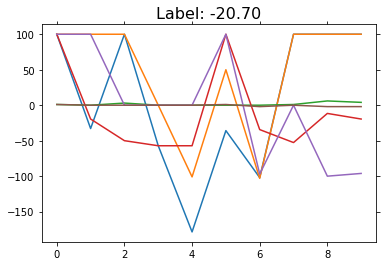

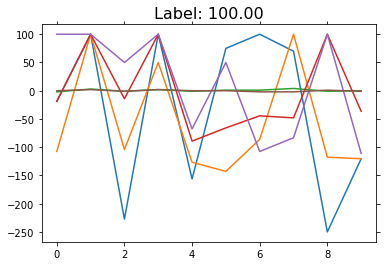

In [ ]:
dloaders.train.show_batch(max_n=2)

In [ ]:
from torchtools.models import *

from fastai2.torch_core import *
from fastai2.data.all import *
from fastai2.basics import *
from fastai2.callback import *

In [ ]:
from torchtools.core import *

In [ ]:
#cuda
loss_fn = get_loss_fn('leaky_loss', alpha=0.5)
learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=loss_fn, metrics=unweighted_profit)

In [ ]:
learn.fit_one_cycle(10, lr_max=1e-5)

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get 

get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x
get x


KeyboardInterrupt: 

In [ ]:
del learn
del dloaders
gc.collect()

1391

In [ ]:
learn.fit_one_cycle(10, lr_max=1e-5)

timenormal
ynormal
ywarp
yscale
yscale
timewarp
ynormal
timenormal
ywarp
yscale
ywarp
timewarp
ywarp
timewarp
ynormal
timewarp
timenormal
yscale
ywarp
yscale
ynormal
timenormal
ynormal
ywarp
timenormal
ynormal
ywarp
ynormal
ynormal
timewarp
timenormal
ywarp
timewarp
ynormal
timewarp
ynormal
ywarp
timewarp
ywarp
ynormal
ywarp
timewarp
timewarp
ywarp
timewarp
timenormal
timenormal
yscale
timenormal
yscale
ynormal
yscale
timewarp
timenormal
ywarp
yscale
ynormal
timenormal
yscale
timewarp
timewarp
ynormal
ynormal
yscale
timewarp
yscale
ywarp
timewarp
ywarp
ynormal
yscale
ywarp
ynormal
yscale
ynormal
timewarp
ynormal
yscale
yscale
ywarp
timenormal
ywarp
timewarp
timenormal
yscale
timenormal
yscale
ywarp
timewarp
timenormal
yscale
ywarp
ynormal
timenormal
ywarp
yscale
timenormal
ynormal
timenormal
ynormal
ynormal
timewarp
ynormal
timewarp
ywarp
yscale
ynormal
yscale
ynormal
timenormal
ywarp
timenormal
ywarp
yscale
timewarp
timenormal
timenormal
timewarp
yscale
ywarp
timewarp
ywarp
ywarp
ynor

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(10, lr_max=1e-5)

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
ywarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillm

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
ywarp
timenormal
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
yscale
ywarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissin

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
yscale
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fill

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
ywarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
ywarp
yscale
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
f

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
ywarp
fillm

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
ynormal
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timenormal
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fil

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
ynormal
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing 

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
timewarp
ywarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillm

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
ywarp
timewarp
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillm

fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes
fillmissing encodes


KeyboardInterrupt: 

### Transforms for preprocessed Data
> works with dataset outputs from torchtools.datasets

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2), ts_names=None): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.ts_names = ts_names
        self.n_channels = len(self.ts_names)
        self.device = default_device()
    
    def setups(self, x):
        self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.means = tensor(self.means)[None,:,None].to(self.device)
        self.stds = tensor(self.stds)[None,:,None].to(self.device)
        
    
    def encodes(self, x:TSTensor):
#         print(type(x))
#         print(x.device)
        return (x-self.means)/self.stds
#         return x
#     @classmethod
#     def from_df()
    
    def decodes(self, x:TSTensor):
        return (x*self.stds)-self.means

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2)): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.device = default_device()
        self.means, self.stds = tensor(mean)[None, :, None].to(self.device), tensor(std)[None,:,None].to(self.device)
#     def setups(self, x):
        
#         self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
#         self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
#         self.means = tensor(self.means)[None,:,None].to(self.device)
#         self.stds = tensor(self.stds)[None,:,None].to(self.device)
        
    
    def encodes(self, x:TSTensor):
        print('normalize')
#         print(type(x))
#         print(x.device)
        return (x-self.means)/self.stds
#         return x
#     @classmethod
#     def from_df()
    
    def decodes(self, x:TSTensor):
        return (x*self.stds)-self.means

In [ ]:
x_train, x_valid=x_all[:10000], x_all[10000:]
y_train, y_valid=y_all[:10000], y_all[10000:]

TypeError: 'int' object is not subscriptable

In [ ]:
x_train, y_train, x_test, y_test = dset
means, stds = x_train.mean((0,2)), x_train.std((0,2))

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
class TensorInt(TensorBase): pass

In [ ]:
def create_items(dset):
    '''
    create items for DataBlock from a UCR dset
    '''
    x_train, y_train, x_test, y_test = dset
    n_train = x_train.shape[0]
    return list(zip(np.concatenate([x_train, x_test]), np.concatenate([y_train, y_test]))), n_train
    
    

### DF Data

In [ ]:
items, n_train = df_to_items(df_main, x_cols, dep, 10000)

(100000, 6, 10)


In [ ]:
valid_idx = list(range(n_train, len(items)))
valid_idx = list(range(n_train, n_train*2)) #hack

In [ ]:
len(items)

100000

In [ ]:
# get_x = lambda x:TSTensor(torch.tensor(x[0]).float())
# get_y = lambda x: x[1]

In [ ]:
get_x = lambda x:TSTensor(torch.tensor(x[0]).float())
get_y = lambda x: x[1]

In [ ]:
get_x(items[0])

TSTensor([[  -7.8431,  100.0000,   -6.4977,  -24.5098,  -33.2226,  -42.7350,
          -55.2486,  -56.4972,  -30.6748,  100.0000],
        [ 100.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
            0.0000,    0.0000,    0.0000,    0.0000],
        [   0.0000,    1.0000,   -1.0000,   -2.0000,   -1.0000,    0.0000,
            0.0000,    0.0000,   -2.0000,    1.0000],
        [ -17.3010,  100.0000,  -30.6748,  -54.9451, -227.2727,  -27.8552,
         -400.0000, -147.0588, -100.0000,  -94.3396],
        [   0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
            0.0000,    0.0000,    0.0000,    0.0000],
        [   0.0000,    1.0000,    0.0000,   -1.0000,   -1.0000,   -1.0000,
           -1.0000,    0.0000,   -1.0000,   -2.0000]])

In [ ]:
get_y(items[0])

-56.49717514124313

In [ ]:
## classification datablocks

dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=RandomSplitter(), get_x=get_x, get_y=get_y,
                  batch_tfms=RandAugment)

dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y, batch_tfms=RandAugment(magnitude=0.2))

dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y)

dblock = DataBlock(blocks=(TransformBlock, CategoryBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y, batch_tfms=[RandAugment(magnitude=0.2), 
                                                         NormalizeTS(mean=means, std=stds)])

In [ ]:
## from df
# items = list(zip(x,y))
valid_idx = list(range(8000, len(items)))

In [ ]:
#regressopm
dblock = DataBlock(blocks=(TransformBlock, TransformBlock),splitter=IndexSplitter(valid_idx),
                   get_x=get_x, get_y=get_y, batch_tfms=[RandAugment(magnitude=0.2)])

In [ ]:
get_x(items[0]).shape

torch.Size([6, 10])

In [ ]:
dloaders = dblock.dataloaders(items, bs=128)

IndexError: invalid index to scalar variable.

In [ ]:
xb,yb = dloaders.train.one_batch()

ynormal
ywarp


In [ ]:
xb,yb = dloaders.valid.one_batch()

In [ ]:
xb.shape

torch.Size([128, 6, 10])

In [ ]:
xb.std((0,2))

TSTensor([79.4662, 66.3991,  1.5024, 79.4000, 66.5795,  1.5024], device='cuda:0')

In [ ]:
dloaders.after_batch

Pipeline: RandAugment

timewarp
ynormal
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


AttributeError: 'Tensor' object has no attribute 'show'

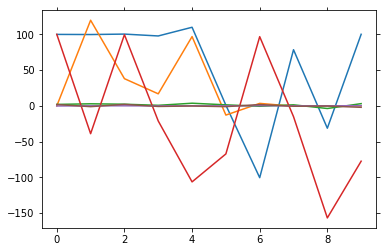

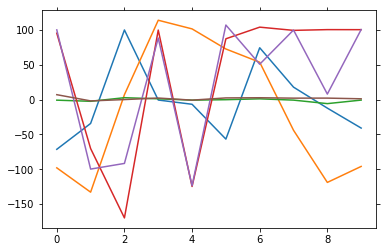

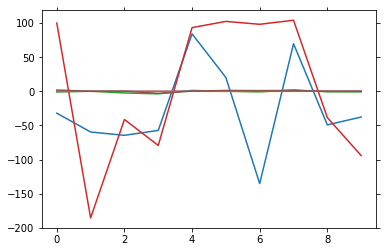

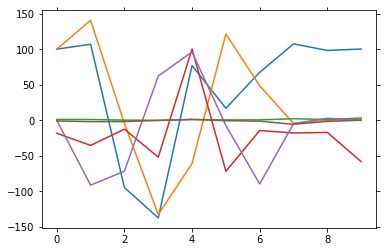

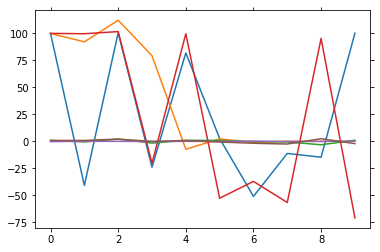

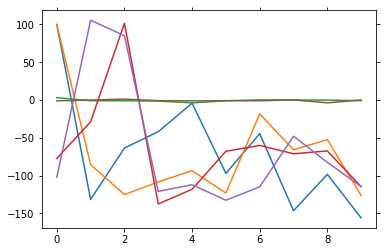

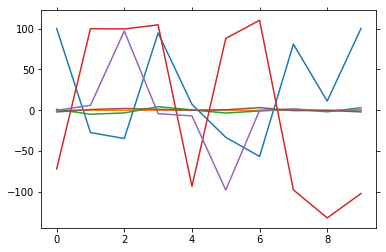

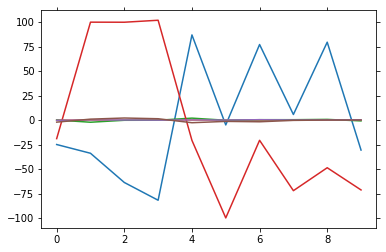

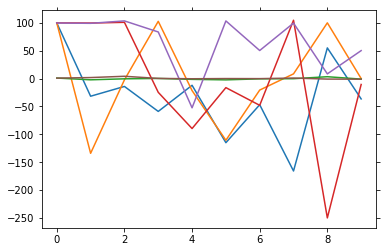

In [ ]:
dloaders.train.show_batch()

In [ ]:
dloaders.c

2

In [ ]:
#cuda
learn = Learner(dloaders, InceptionTime(6,1), loss_func=F.mse_loss)

timenormal
ynormal
yscale
ywarp
timenormal
ynormal
timenormal
ywarp
timenormal
yscale
ynormal
ywarp
timewarp
timenormal
yscale
ywarp
timewarp
yscale
ywarp
timewarp
yscale
timenormal
ynormal
yscale
ywarp
timenormal
ywarp
yscale
yscale
ynormal
ynormal
yscale
ywarp
ynormal
yscale
timenormal
ynormal
yscale
timenormal
timewarp
ywarp
timewarp
yscale
timewarp
timewarp
timenormal
timewarp
yscale
timenormal
ynormal
ywarp
timenormal
ynormal
ywarp
ynormal
timewarp
timenormal
ynormal
timenormal
timewarp
timenormal
ynormal
timenormal
ynormal
ynormal
timewarp
ywarp
timewarp
yscale
timewarp
yscale
timewarp
ywarp
timewarp
ynormal
timewarp
ywarp
timenormal
ynormal
yscale
ynormal
ywarp
timenormal
timewarp
ywarp
yscale
ynormal
timewarp
yscale
ynormal
ynormal
ywarp
ynormal
timewarp
ywarp
yscale
yscale
ynormal
ywarp
timewarp
timenormal
ywarp
yscale
ynormal
timenormal
ynormal
ywarp
timenormal
yscale
ywarp
timenormal
yscale
yscale
timewarp
timenormal
timewarp
timewarp
timenormal
timewarp
ynormal
timewarp
ywa

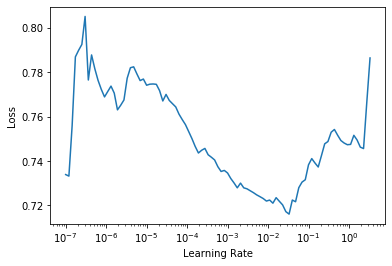

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=3e-3)

timenormal
timewarp


/home/johannes/coding/python/fastai2/fastai2/learner.py:250: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.loss = self.loss_func(self.pred, *self.yb); self('after_loss')


ynormal
timewarp
ywarp
timewarp
timenormal
ynormal
timewarp
yscale
timenormal
ynormal
yscale
ywarp
ywarp
timewarp
yscale
ywarp
timenormal
ynormal
timenormal
yscale
timenormal
timewarp
timewarp
ynormal
ywarp
timewarp
ywarp
timenormal
timenormal
ynormal
timewarp
ywarp
ynormal
yscale
ynormal
timewarp
yscale
ynormal
yscale
timenormal
ywarp
yscale
timewarp
ynormal
yscale
ywarp
timenormal
ywarp
timewarp
timenormal
timewarp
timenormal
timenormal
ywarp
timewarp
ywarp
timewarp
ywarp
timewarp
ynormal
timenormal
yscale
timenormal
ywarp
timenormal
ywarp
timenormal
ywarp
ywarp
yscale
yscale
ynormal
yscale
timenormal
yscale
timenormal
timewarp
timenormal
timenormal
ynormal
yscale
timenormal
timewarp
yscale
ynormal
yscale
ynormal
yscale
ywarp
timenormal
ynormal
yscale
timenormal
yscale
timewarp
timenormal
timewarp
yscale
yscale
ynormal
ywarp
timewarp
yscale
timewarp
timewarp
ywarp
ynormal
timenormal
timewarp
timenormal
timewarp
ynormal
timewarp
ywarp
timenormal
timewarp
timenormal
timewarp
ynormal
ys

/home/johannes/coding/python/fastai2/fastai2/learner.py:250: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.loss = self.loss_func(self.pred, *self.yb); self('after_loss')


timewarp
timenormal
yscale
ywarp
yscale
ynormal
ywarp
yscale
ywarp
timenormal
timewarp
ywarp
yscale
timewarp
yscale
ywarp
timewarp
yscale
yscale
timewarp
ynormal
yscale
timenormal
yscale
ynormal
timenormal
timewarp
ynormal
timewarp
ynormal
timewarp
yscale
yscale
timewarp
ywarp
yscale
ywarp
ynormal
timewarp
timenormal
ywarp
timewarp
timenormal
ywarp
timewarp
timenormal
timewarp
ynormal
ywarp
ynormal
ynormal
ywarp
yscale
timewarp
timewarp
ynormal
timewarp
yscale
yscale
timewarp
ynormal
timewarp
timenormal
yscale
yscale
timewarp
ynormal
yscale
timewarp
ywarp
ywarp
timewarp
yscale
timewarp
ywarp
ynormal
yscale
timenormal
timenormal
yscale
yscale
timewarp
timenormal
ywarp
ywarp
yscale
timewarp
yscale
ynormal
ywarp
ynormal
ywarp
timenormal
ynormal
timenormal
timewarp
ynormal
timenormal
timenormal
timewarp
ywarp
yscale
ynormal
timewarp
timewarp
ynormal
timenormal
ywarp
ynormal
ywarp
yscale
ynormal
yscale
timewarp
yscale
ynormal
timenormal
yscale
timewarp
timenormal
timenormal
yscale
ywarp
yno

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(50, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.969288,2.072256,0.200000,00:01
1,1.770903,1.838587,0.500000,00:01
2,1.580220,1.237248,0.712500,00:01
3,1.394947,0.968883,0.743750,00:01
4,1.266358,1.031001,0.631250,00:01
5,1.107616,1.087917,0.646875,00:01
6,1.099880,0.943391,0.668750,00:02
7,0.998527,0.904510,0.743750,00:01
8,0.964991,1.198830,0.575000,00:01
9,0.863990,0.850304,0.781250,00:01


timenormal
yscale
timenormal
yscale
ynormal
yscale
ynormal
ywarp
timewarp
ywarp
ywarp
timewarp
timewarp
ywarp
ynormal
timenormal
timenormal
yscale
yscale
timenormal
yscale
timenormal
timewarp
ynormal
ywarp
timenormal
ynormal
yscale
ynormal
timewarp
timenormal
yscale
timenormal
ynormal
yscale
ywarp
timenormal
ynormal
ywarp
timenormal
ynormal
timewarp
timewarp
ywarp
timenormal
timewarp
ynormal
ywarp
yscale
timenormal
timenormal
ynormal
yscale
timenormal
timenormal
ynormal
ynormal
timenormal
timewarp
yscale
timewarp
yscale
ywarp
yscale
timewarp
timenormal
yscale
timenormal
yscale
timenormal
timenormal
timewarp
yscale
timenormal
yscale
timewarp
yscale
ywarp
timewarp
ywarp
ywarp
ynormal
timewarp
ywarp
timewarp
ynormal
timenormal
yscale
timewarp
ywarp
ywarp
yscale
yscale
ynormal
timewarp
ywarp
ywarp
ynormal
ywarp
ynormal
timenormal
ywarp
timewarp
timenormal
ynormal
timewarp
timewarp
yscale
ywarp
timewarp
ywarp
yscale
timewarp
ynormal
ynormal
timewarp
ynormal
yscale
ynormal
ywarp
timewarp
tim

ywarp
yscale
timewarp
ywarp
yscale
ynormal
timenormal
ywarp
ywarp
timenormal
timenormal
ywarp
ywarp
ynormal
timewarp
timenormal
ywarp
timenormal
timenormal
timewarp
ynormal
yscale
yscale
ynormal
ywarp
yscale
timewarp
ynormal
ynormal
ywarp
timenormal
yscale
timewarp
ywarp
yscale
timenormal
timenormal
yscale
timenormal
ywarp
ywarp
timewarp
timewarp
ynormal
ywarp
timenormal
timenormal
yscale
ynormal
timenormal
yscale
ynormal
yscale
timenormal
yscale
timewarp
ynormal
ywarp
ynormal
timenormal
timenormal
ywarp
yscale
timewarp
yscale
ywarp
timenormal
ynormal
timewarp
yscale
yscale
timewarp
timenormal
ynormal
ynormal
ywarp
timenormal
yscale
timewarp
ynormal
ynormal
ywarp
timewarp
timenormal
yscale
timenormal
ywarp
timenormal
timenormal
ynormal
ywarp
timewarp
ynormal
yscale
ynormal
ywarp
timewarp
timenormal
timenormal
timewarp
timenormal
ynormal
ynormal
timewarp
ynormal
timewarp
timenormal
ywarp
ynormal
timewarp
timewarp
ynormal
yscale
ynormal
ynormal
yscale
ynormal
ywarp
timewarp
yscale
yscale

In [ ]:
learn.fit_one_cycle(10, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.948434,2.020151,0.234375,00:01
1,1.567360,1.467754,0.396875,00:01
2,1.355849,2.331620,0.434375,00:01
3,1.212197,0.993076,0.709375,00:01
4,1.030451,0.658669,0.787500,00:01
5,0.879349,0.640554,0.828125,00:01
6,0.732076,0.603749,0.803125,00:01
7,0.615003,0.497322,0.890625,00:01
8,0.507467,0.459992,0.893750,00:01
9,0.434670,0.451862,0.903125,00:01


In [ ]:
x,y = dloaders.one_batch()

x.mean((0,2)), x.std((0,2))

In [ ]:
x,y = dloaders.one_batch()

x.mean((0,2)), x.std((0,2))

yscale
timewarp


(TSTensor([-0.0100, -0.0117,  0.0011], device='cuda:0'),
 TSTensor([1.0111, 1.0019, 1.0120], device='cuda:0'))